**Machine Learning Modeling: Predicting Machine Failure (0 = No, 1 = Failure)**
I the first stage of this project, I have applied supervised machine learning models to predict whether a machine would fail based on operational features such as:

Air temperature

Process temperature

Rotational speed

Torque

Tool wear

Failure mode indicators (TWF, HDF, PWF, OSF, RNF)

Machine type (encoded as Type_L, Type_M)

**Objective**
To train classifiers that can accurately distinguish between healthy (0) and failing (1) machines.

In [1]:
import pandas as pd
df = "/content/ai4i2020.csv"
df = pd.read_csv(df)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [2]:
df.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [3]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Display basic information
print("Basic Info:")
print(df.info())

# Show the first few rows
print("\n First 5 rows:")
print(df.head())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\n Duplicates:")
print(df.duplicated().sum())

# Describe numerical features
print("\n Statistical Summary:")
print(df.describe())

# Check unique values in 'Type' column
print("\n Unique Product Types:")
print(df['Type'].value_counts())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(


 Cleaned Columns:
Index(['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque',
       'Tool_wear', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_L', 'Type_M'],
      dtype='object')

 Machine Failure Distribution:
Machine_failure
0    9661
1     339
Name: count, dtype: int64


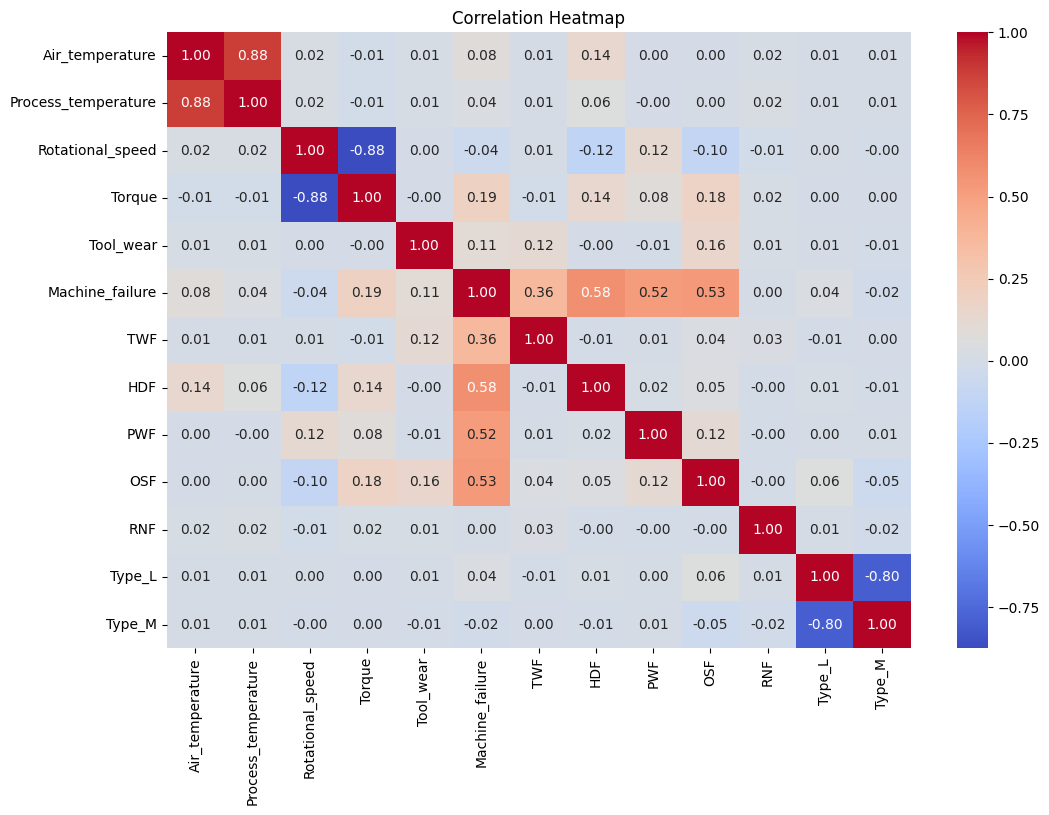

In [5]:
# Convert 'Type' to one-hot encoding
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Drop 'Product ID' and 'UDI' (irrelevant for ML)
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Optional: Rename column names for easier handling
df.columns = [col.replace(" [K]", "").replace(" [rpm]", "").replace(" [Nm]", "").replace(" [min]", "").replace(" ", "_") for col in df.columns]

# View the cleaned dataframe
print("\n Cleaned Columns:")
print(df.columns)

# Check class imbalance in target
print("\n Machine Failure Distribution:")
print(df['Machine_failure'].value_counts())

# Visualize correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


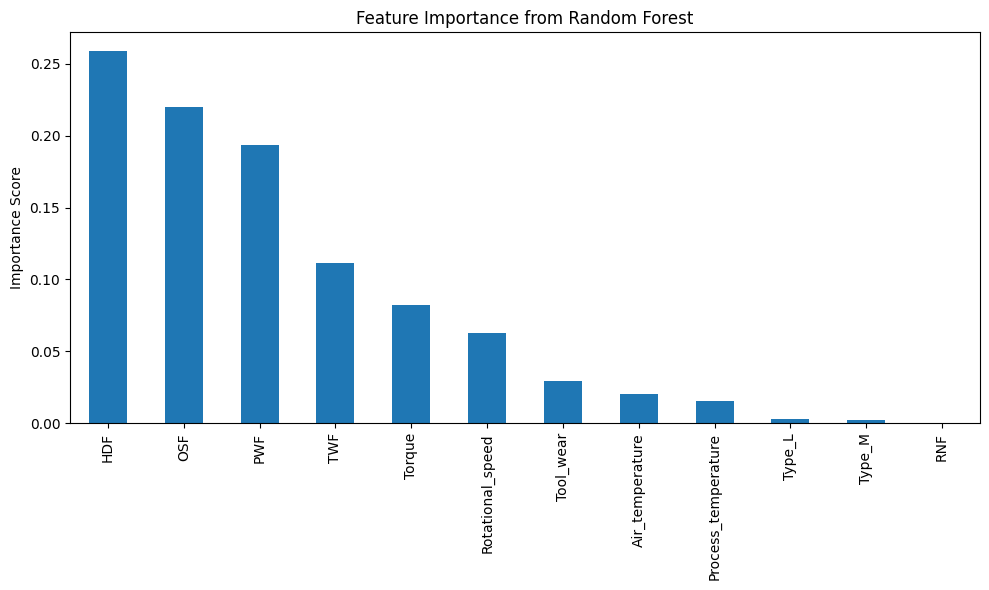

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the data
X = df.drop('Machine_failure', axis=1)
y = df['Machine_failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


In [7]:
print(type(X_test))
print(X_train.dtypes)



<class 'pandas.core.frame.DataFrame'>
Air_temperature        float64
Process_temperature    float64
Rotational_speed         int64
Torque                 float64
Tool_wear                int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
Type_L                    bool
Type_M                    bool
dtype: object


In [8]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')


In [9]:

print(X_train.dtypes)



Air_temperature        float64
Process_temperature    float64
Rotational_speed       float64
Torque                 float64
Tool_wear              float64
TWF                    float64
HDF                    float64
PWF                    float64
OSF                    float64
RNF                    float64
Type_L                 float64
Type_M                 float64
dtype: object


PermutationExplainer explainer: 2001it [10:30,  3.17it/s]


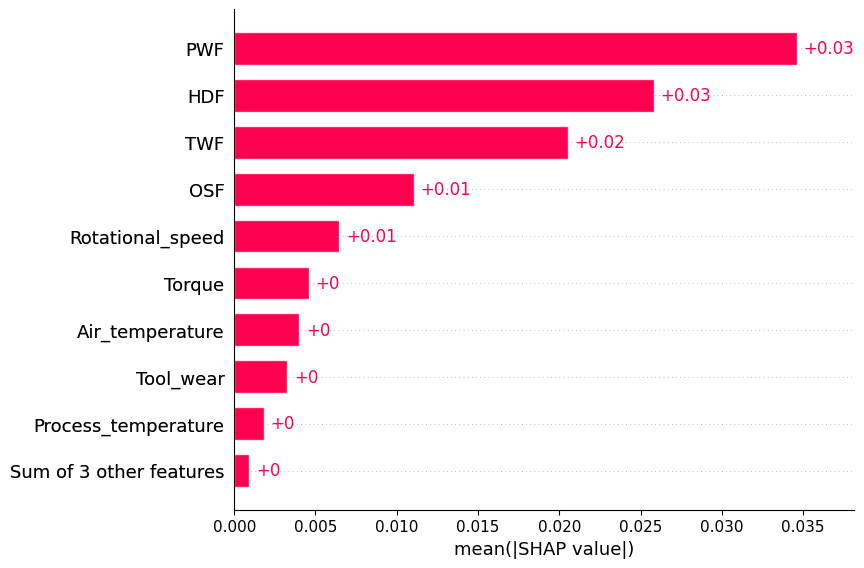

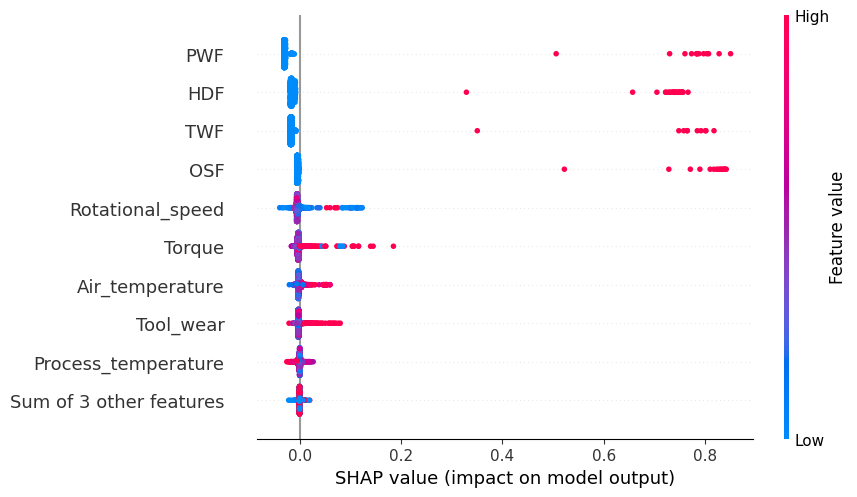

In [10]:
import shap



# Train a fresh model to be safe
rf.fit(X_train, y_train)

# Create a wrapper around predict_proba for class 1
def model_prob(X):
    return rf.predict_proba(X)[:, 1]  # class 1 (failure)

# Use KernelExplainer for general model outputs
explainer = shap.Explainer(model_prob, X_train, algorithm='permutation')  # 'permutation' is slow but safe

# Compute SHAP values
shap_values = explainer(X_test)

# Global explanation
shap.plots.bar(shap_values)

# Detailed beeswarm plot
shap.plots.beeswarm(shap_values)


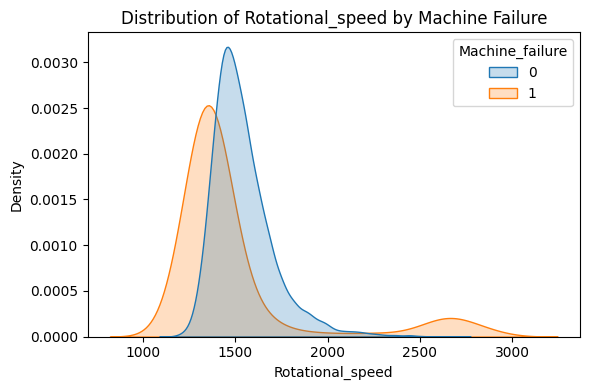

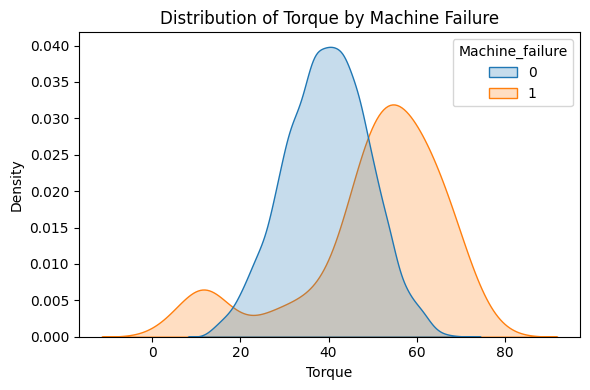

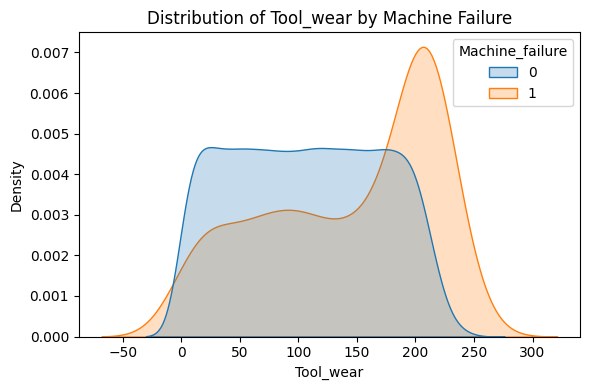

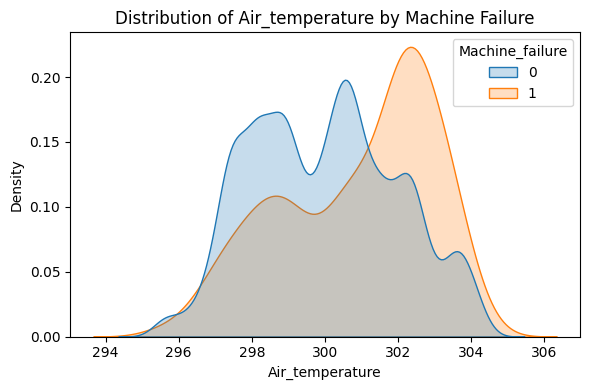

<ipython-input-11-c97adbc8197c>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Machine_failure', fill=True, common_norm=False)


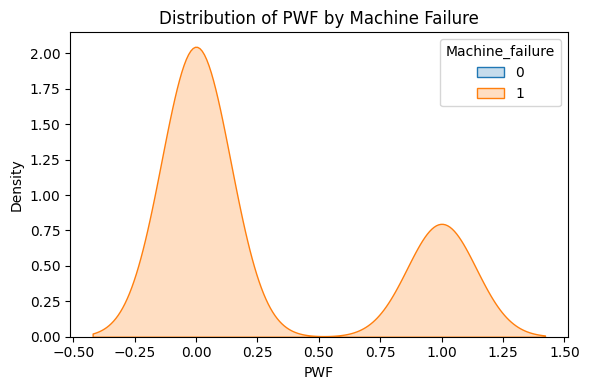

<ipython-input-11-c97adbc8197c>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Machine_failure', fill=True, common_norm=False)


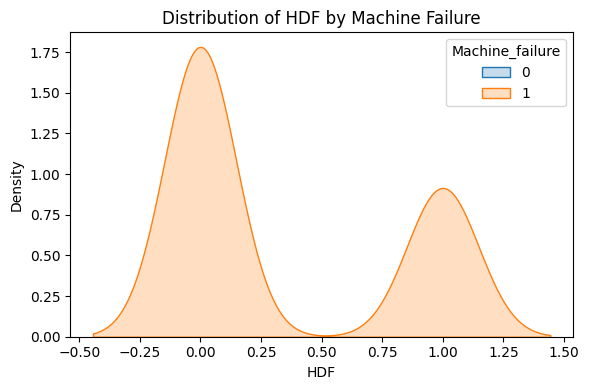

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Rotational_speed', 'Torque', 'Tool_wear', 'Air_temperature', 'PWF', 'HDF']

for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='Machine_failure', fill=True, common_norm=False)
    plt.title(f'Distribution of {col} by Machine Failure')
    plt.tight_layout()
    plt.show()


Step 3: Handle Class Imbalance using SMOTE

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution before and after
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())


Before SMOTE:
 Machine_failure
0    7729
1     271
Name: count, dtype: int64
After SMOTE:
 Machine_failure
0    7729
1    7729
Name: count, dtype: int64


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on original test set (not oversampled!)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1932
           1       0.67      0.96      0.79        68

    accuracy                           0.98      2000
   macro avg       0.83      0.97      0.89      2000
weighted avg       0.99      0.98      0.98      2000

Confusion Matrix:
 [[1900   32]
 [   3   65]]
ROC AUC Score: 0.9874177932042383


In [14]:
!pip install xgboost


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train XGBoost on SMOTE data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:51:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1932
           1       0.78      0.96      0.86        68

    accuracy                           0.99      2000
   macro avg       0.89      0.97      0.93      2000
weighted avg       0.99      0.99      0.99      2000

XGBoost Confusion Matrix:
 [[1914   18]
 [   3   65]]
XGBoost ROC AUC Score: 0.9948772987455852


In [16]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score (LR):", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression Confusion Matrix:
 [[1932    0]
 [   2   66]]
ROC AUC Score (LR): 0.978443551333577


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5, scoring='f1')
print("Mean F1 across 5 folds:", scores.mean())


Mean F1 across 5 folds: 0.9864654852871663


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Use this for training and cross-validation
pipeline.fit(X_train, y_train)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("Scaled Logistic Regression F1:", scores.mean())


Scaled Logistic Regression F1: 0.9864654852871663


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (1)": precision_score(y_test, y_pred),
        "Recall (1)": recall_score(y_test, y_pred),
        "F1 Score (1)": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }


In [20]:
from sklearn.metrics import roc_curve, precision_recall_curve

# For ROC and PR plots
y_proba_log = pipeline.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

precision_log, recall_log, _ = precision_recall_curve(y_test, y_proba_log)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)


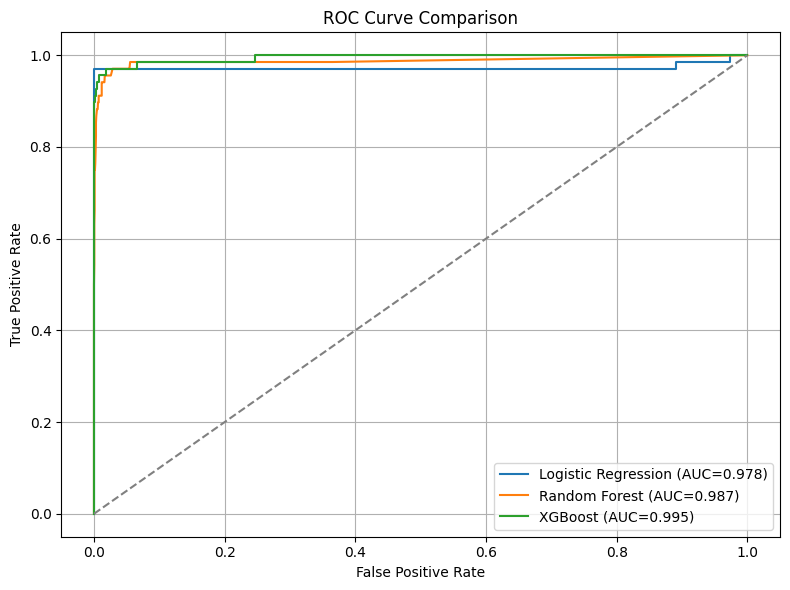

In [21]:
# ROC Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC=0.978)')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC=0.987)')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC=0.995)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

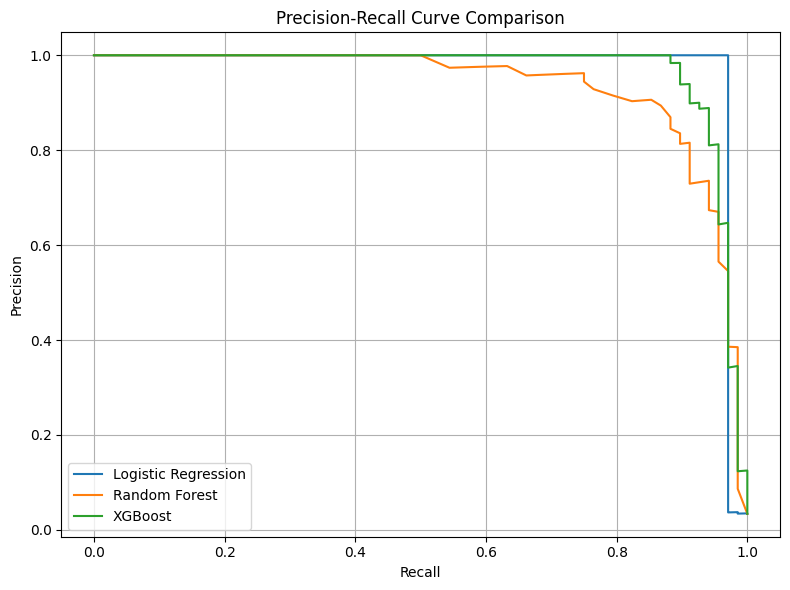

In [22]:
# PR Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for ROC AUC

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Now use it for each model
results = []

results.append(evaluate_model("Logistic Regression", pipeline, X_test, y_test))
results.append(evaluate_model("Random Forest", rf_model, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb_model, X_test, y_test))

# Create dataframe
model_comparison_df = pd.DataFrame(results)

# Display
from IPython.display import display
display(model_comparison_df)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.9990,1.000000,0.970588,0.985075,0.972567
1,Random Forest,0.9825,0.670103,0.955882,0.787879,0.987418
2,XGBoost,0.9895,0.783133,0.955882,0.860927,0.994877


Bayesian Networks